In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

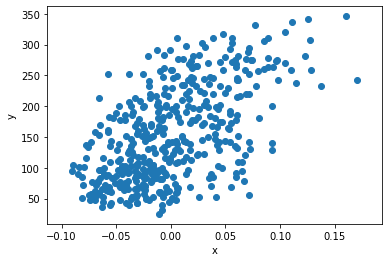

In [6]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
x= diabetes.data[:, 2]
y = diabetes.target

In [9]:
w=1.0
b=1.0
y_hat=x[0]*w+b
print(y_hat)

1.0616962065186886


In [12]:
print(y[0])

151.0


In [15]:
w_inc = w + 0.1
y_hat_inc = x[0]*w_inc+b
print(y_hat_inc)

1.0678658271705574


In [17]:
w_rate = (y_hat_inc - y_hat)/(w_inc-w)
print(w_rate)

0.061696206518688734


In [0]:
w_new = w+w_rate

In [0]:
b_inc = b+0.1
y_hat_inc = x[0]*w+b_inc

b_rate = (y_hat_inc - y_hat)/(b_inc - b)

In [21]:
b_new = b+1
print(b_new)

2.0


In [22]:
err = y[0] - y_hat
w_new= w+w_rate*err
b_new = b+1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [24]:
y_hat = x[1]*w_new +b_new
err = y[1]-y_hat
w_rate = x[1]
b_rate = 1
w_new = w_new+w_rate*err
b_new = b_new+1*err
print(w_new, b_new)

14.122032764040299 75.7274477824319


In [25]:
for x_i, y_i in zip(x,y):
  y_hat = x_i*w +b
  err = y_i-y_hat
  w_rate = x_i
  b_rate = 1
  w=w+w_rate*err
  b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


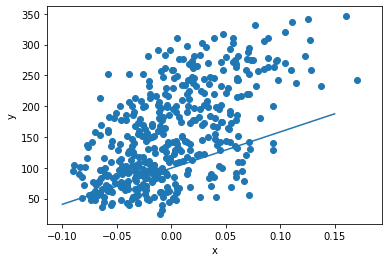

In [29]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2= (0.15, 0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
for i in range(1,100):  
  for x_i, y_i in zip(x,y):
    y_hat = x_i*w +b
    err = y_i-y_hat
    w_rate = x_i
    b_rate = 1
    w=w+w_rate*err
    b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


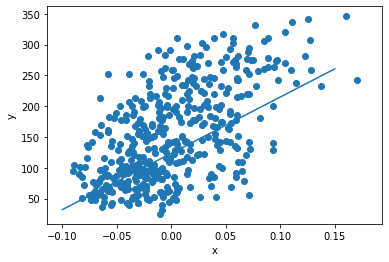

In [31]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2= (0.15, 0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
class Neuron:
  def __init__(self):
    self.w=1.0
    self.b=1.0

  def forpass(self, x):
    y_hat = x*self.w +self.b
    return y_hat

  def backprop(self, x ,err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def fit(self, x,y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i -y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w = self.w-w_grad
        self.b -= b_grad

In [0]:
neuron = Neuron()
neuron.fit(x,y)

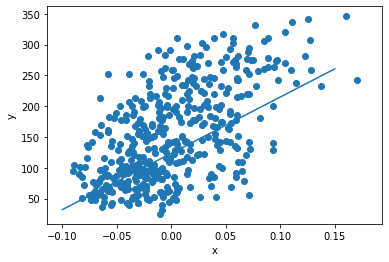

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
pt1 = (-0.1, -0.1*neuron.w+neuron.b)
pt2 = (0.15, 0.15*neuron.w+neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
print(pt1[0])
print(pt2[0])
print(pt1[1])
print(pt2[1])

-0.1
0.15
32.03441018831299
260.4337442969606
